# Titanic passangers analysis

You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task won't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 6 rows

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
dataset = pd.read_csv('titanic.csv')
dataset.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What was the least popular port of embarkation?
    * How many passenger classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every passenger class?
Please, write not only the answers but the code, proving it.

In [75]:
dataset.info() # выведем информацию о колонках

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Are there any missing values? In what columns?
Заметим, что всего у нас 891 запись в датасете. Также мы видим информацию о значениях во всех колонках. Там, где non-null значений не 891 присутствуют null значения.

Таким образом, пропуски есть в следующих колонках: **Age**, **Cabin**, **Embarked**
## What is the percentage of survived passengers? Are the classes balanced?


In [77]:
percentage_of_survived = (dataset['Survived'].sum() / dataset['Survived'].count()) * 100
percentage_of_survived

38.38383838383838

Поскольку в данном датасете Survived принимает только 2 значения 0 и 1 найдем процент выживших поделив сумму на количество (и помножив на 100)

**Процент выживших: 38.38383838383838**

In [82]:
class_count = dataset['Pclass'].value_counts()
total_count = dataset['Pclass'].count()

for pclass, count in class_count.items():
  print(f'Class {pclass}: {count / total_count * 100}%')

Class 3: 55.106621773288445%
Class 1: 24.242424242424242%
Class 2: 20.65095398428732%


Видим, что представителей класса 3 более половины, в то время как людей, принадлежащих 1 и 2 классу примерно одинаково. **Из этого можно сделать вывод, что классы пассажиров несбалансированы**
## Were there more males or females?

In [83]:
gender_count = dataset['Sex'].value_counts()

for gender, count in gender_count.items():
  print(f'{gender}: {count}')

male: 577
female: 314


**Мужчин больше чем женщин**
## What was the least popular port of embarkation?

In [84]:
embarkation_count = dataset['Embarked'].value_counts()

least_popular_port = embarkation_count.idxmin()
print(f'The least popular port of embarkation was {least_popular_port}')

The least popular port of embarkation was Q


**Наименее популярный порт - Q**
## How many passenger classes (pclass) were there on Tinanic?

In [85]:
passanger_classes_count = dataset['Pclass'].nunique()
print(f'Число классов среди пассажиров: {passanger_classes_count}')

Число классов среди пассажиров: 3


**Число классов среди пассажиров: 3**
## What is the overall average ticket fare? And for every passenger class?

In [86]:
average_fare = dataset['Fare'].mean()
print(average_fare)

32.204207968574636


In [87]:
average_fare_for_class = dataset.groupby('Pclass')['Fare'].mean()
print(average_fare_for_class)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


**Средняя цена на билет составляла 32.20 тысячи долларов (?предполгаю цена в тыс.долларах).**

**Средняя цена на билеты всех классов(тыс. долларов):**

1: 84.15

2: 20.66

3: 13.68

**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example).

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the median age? And among males and females separately? Visualize it on the separate plot
    * Make conclusions about what you see on the plots

## What is the minimal and maximum ages of the passengers? Visualize it on the plot

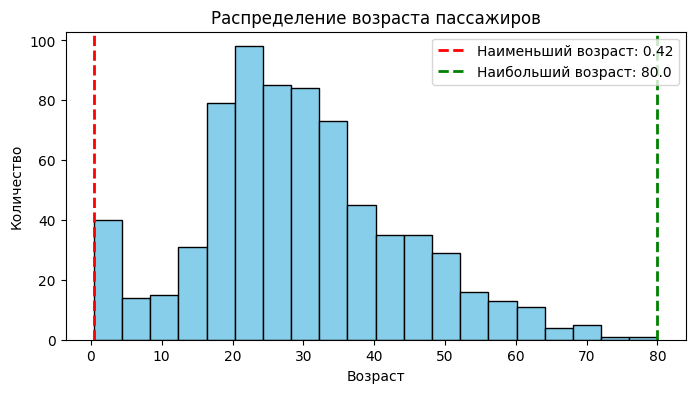

Наименьший возраст пассажира: 0.42
Наибольший возраст пассажира: 80.0


In [89]:
min_age = dataset['Age'].min()
max_age = dataset['Age'].max()

plt.figure(figsize=(8, 4))
plt.hist(dataset['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение возраста пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.axvline(min_age, color='red', linestyle='dashed', linewidth=2, label=f'Наименьший возраст: {min_age}')
plt.axvline(max_age, color='green', linestyle='dashed', linewidth=2, label=f'Наибольший возраст: {max_age}')
plt.legend()
plt.show()

print(f"Наименьший возраст пассажира: {min_age}")
print(f"Наибольший возраст пассажира: {max_age}")

## What is the median age? And among males and females separately? Visualize it on the separate plot

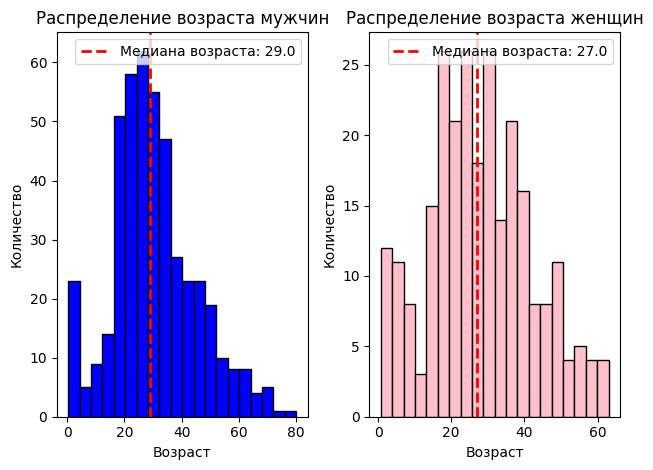

Общая медиана возраста: 28.0
Медиана возраста для мужчин: 29.0
Медиана возраста для женщин: 27.0


In [91]:
median_age = dataset['Age'].median()
median_age_male = dataset[dataset['Sex'] == 'male']['Age'].median()
median_age_female = dataset[dataset['Sex'] == 'female']['Age'].median()

# График для мужчин
plt.subplot(1, 2, 1)
plt.hist(dataset[dataset['Sex'] == 'male']['Age'], bins=20, color='blue', edgecolor='black')
plt.title('Распределение возраста мужчин')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.axvline(median_age_male, color='red', linestyle='dashed', linewidth=2, label=f'Медиана возраста: {median_age_male}')
plt.legend()

# График для женщин
plt.subplot(1, 2, 2)
plt.hist(dataset[dataset['Sex'] == 'female']['Age'], bins=20, color='pink', edgecolor='black')
plt.title('Распределение возраста женщин')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.axvline(median_age_female, color='red', linestyle='dashed', linewidth=2, label=f'Медиана возраста: {median_age_female}')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Общая медиана возраста: {median_age}")
print(f"Медиана возраста для мужчин: {median_age_male}")
print(f"Медиана возраста для женщин: {median_age_female}")

## Общий вывод по графикам
Глядя на построенные графики можно сделать вывод, что большая часть пассажиров - представители среднего возраста (скажу от 20 до 45). Среди мужчин было больше возрастных пассажиров, что в принципе кореллирует с тем, что мужчин на лайнере было больше.

**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot and is not middle name.

## How many are there unique titles?

In [98]:
import re
# Данный кусок кода я сделал с chatGPT, меня немного смущают некоторые префиксы, но надеюсь это нормально :(
title_pattern = r',\s(.*?)\.'
dataset['Title'] = dataset['Name'].apply(lambda x: re.search(title_pattern, x).group(1))
unique_title_count = dataset['Title'].nunique()
print(unique_title_count)
print(dataset['Title'].unique()) # Выведем эти префиксы

17
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


**Всего 17 уникальных префиксов**

## How many are there passengers with every title?

In [99]:
passangers_with_each_title = dataset['Title'].value_counts()
passangers_with_each_title

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

**Здесь видно, сколько пассажиров имеют каждый из уникальных префиксов**
## What is the most popular man's title? And woman's title?

In [100]:
man_titles = dataset[dataset['Sex'] == 'male']['Title']
woman_titles = dataset[dataset['Sex'] == 'female']['Title']

most_popular_man_title = man_titles.mode().values[0]
most_popular_woman_title = woman_titles.mode().values[0]
print(most_popular_man_title, most_popular_woman_title)

Mr Miss


**Самый популярные префиксы: Mr для мужчин и Miss для женщин.**

**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each class and visualize price distribution for each class as well. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). Main point here is to **choose** plots wisely and **make meaningful conclusions**



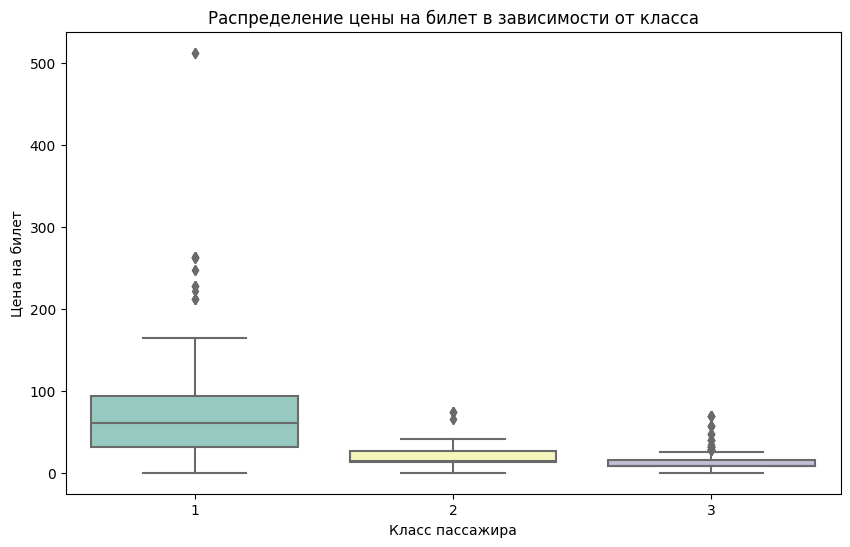

Средняя цена на билет в зависимости от класса
   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550


In [103]:
mean_price_by_class = dataset.groupby('Pclass')['Fare'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=dataset, palette='Set3')
plt.title('Распределение цены на билет в зависимости от класса')
plt.xlabel('Класс пассажира')
plt.ylabel('Цена на билет')
plt.show()

print("Средняя цена на билет в зависимости от класса")
print(mean_price_by_class)

**Судя по графику, можно сделать вывод, что корреляция между классом пассажира и ценой на билет присутствует, так как чем выше класс(в данном случае первый класс - самый лучший), тем выше цены на билеты и средняя цена, соответственно, тоже.**